<a href="https://colab.research.google.com/github/mauricionoris/fm/blob/master/Gradiente_Descendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradiente descendente

O **gradiente descendente** é um dos algoritmos mais fundamentais da otimização numérica e do aprendizado de máquina. Ele consiste em ajustar iterativamente os parâmetros de um modelo na direção oposta ao gradiente da função de erro, buscando o ponto onde esse erro é mínimo. Em outras palavras, o método procura o conjunto de valores que melhor explica os dados, reduzindo o erro entre as previsões do modelo e os valores reais. Essa ideia simples, porém poderosa, é a base de grande parte do treinamento de modelos modernos de inteligência artificial.

Sua importância se torna evidente no contexto das **redes neurais artificiais**, onde o número de parâmetros é enorme e a superfície de erro é altamente complexa. O gradiente descendente permite atualizar cada peso da rede de forma eficiente, guiando o processo de aprendizado em direção a uma configuração que minimize o erro global. Mesmo em problemas não lineares e de alta dimensionalidade, ele fornece uma maneira sistemática de encontrar boas soluções, especialmente quando combinado com variações como o gradiente descendente estocástico (SGD) e algoritmos adaptativos como Adam e RMSProp.

Além de ser o motor por trás do aprendizado em redes neurais, o gradiente descendente também ajuda a compreender **como as redes aprendem**. Ele mostra, passo a passo, como os ajustes nos pesos afetam o erro e o desempenho do modelo, permitindo uma visão concreta do processo de aprendizagem. Estudar o gradiente descendente é, portanto, essencial para entender não apenas o funcionamento interno das redes neurais, mas também os desafios de convergência, overfitting e eficiência computacional que surgem na prática.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

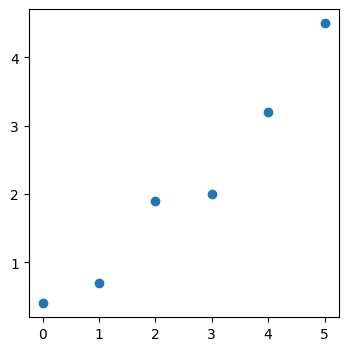

In [5]:
x_ = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y_ = np.array([0.4,0.7,1.9,2.0,3.2,4.5])


fig = plt.figure(figsize=(4,4))
plt.scatter(x_,y_)
plt.show()

# Método de erro quadrado



$$
\sum_{i=1}^{n} (y_i - b - a x_i)^2
$$


In [8]:
def calcula_erro(a,b):
  soma=0.0
  n =x_.shape[0]
  for i in range(n):
    e = y_[i]-(a*x_[i]+b)
    soma += e*e
  return soma/n

a = np.arange(-2,3,0.1)
b = np.arange(-2,3, 0.1)
aa,bb = np.meshgrid(a,b,sparse=True)

err = calcula_erro(aa,bb)



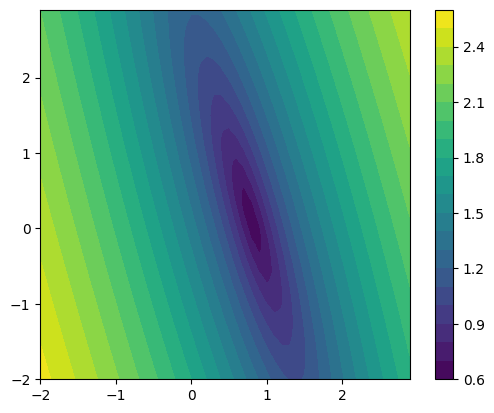

In [13]:
z=np.power(err,0.2)
n_levels = 20
h = plt.contourf(a,b,z, n_levels)
plt.axis('scaled')
plt.colorbar()
plt.show()

# Gradiente Descendente

$$
\frac{\partial erro}{\partial a} = 2 \sum_{i=1}^{n} (y_i - b - a x_i)(-x_i)=0
$$

$$
\frac{\partial erro}{\partial b} = 2 \sum_{i=1}^{n} (y_i - b - a x_i)(-1)=0
$$


In [15]:
def calcula_da(a,b):

  soma = 0.0
  for i in range(x_.shape[0]):
    soma+=x_[i]*(y_[i]-(a*x_[i]+b))
  return -2*soma

def calcula_db(a,b):

  soma = 0.0
  for i in range(x_.shape[0]):
    soma+= (y_[i]-(a*x_[i]+b))
  return -2*soma


In [29]:
def gradiente_descendente2(a0,b0,tol,max_it,learning_rate):


  erro0 = calcula_erro(a0,b0)
  erros = [erro0]
  caminho = [[a0,b0]]
  for it in range(max_it):
    da = calcula_da(a0,b0)
    db = calcula_db(a0,b0)
    a1 = a0 - learning_rate*da
    b1 = b0 - learning_rate*db

    erro1 = calcula_erro(a1,b1)
    erros.append(erro1)
    caminho.append([a1,b1])



    if abs(erro1 - erro0)<tol and abs(a1-a0)<tol and abs(b1-b0)<tol :
      print(f'convergiu na iteracao {it}')
      print(f'erro atual {erro1:3.f}, detal erro = {erro1-erro0}')

      break

    a0 = a1
    b0 = b1
  print(f'Solucao a={a1:.3f}, b={b1:.3f}')

  return a0,b0,np.array(caminho),np.array(erros)


In [30]:
def gradiente_descendente(a0,b0,tol,max_it,learning_rate):

  for it in range(max_it):
    da = calcula_da(a0,b0)
    db = calcula_db(a0,b0)
    a1 = a0 - learning_rate*da
    b1 = b0 - learning_rate*db


    if abs(a1-a0)<tol and abs(b1-b0)<tol :
      print(f'convergiu na iteracao {it}')
      break

    a0 = a1
    b0 = b1

  return a0,b0

Solucao a=0.803, b=0.110


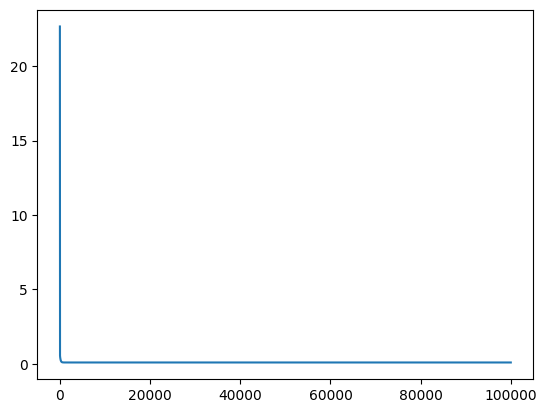

In [31]:
a0_gd, b0_gd, caminho, erros = gradiente_descendente2(-1,+1,1e-5, 100000, 0.001)

interacao = np.linspace(0, erros.shape[0]-1, erros.shape[0])
plt.plot(interacao,erros)
plt.show()

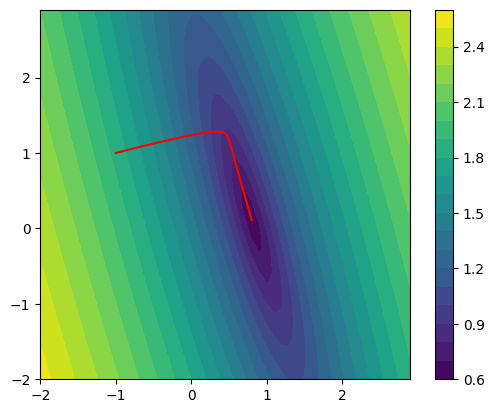

In [27]:
h = plt.contourf(a,b,z,n_levels)
plt.axis('scaled')
plt.plot(caminho[:,0],caminho[:,1],'r')
plt.colorbar()
plt.show()




# Referências

- Youtube [Marcelo Gattass](https://www.youtube.com/watch?v=VrDiMsVyLMw)
- Youtube [Rodrigo Gerra](https://www.youtube.com/watch?v=Q12BnC-Bo50)

# Exercícios



1. Faça experimentos com o número máximo de interações em (100,500 e 1000). Apresente os resultados
2. Faça experimentos com o learning_rate = (0.1, e 0.01). Apresente os resultados
